In [1]:
from numpy import loadtxt 
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
from keras import regularizers
from keras.models import Sequential 
from keras.layers import Dense 
from keras import regularizers
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
#from keras.layers import Dropout

In [2]:
dataset = loadtxt ('pima-indians-diabetes.csv', delimiter=',')
x=dataset[:,0:8]
y=dataset[:,8]

In [3]:
#Scaling the dataset

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X=sc.fit_transform(x)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20,random_state=1)

In [5]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss',min_delta=0.001,restore_best_weights=True, patience=10, verbose=1, mode='auto')

In [18]:
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu')) # 12 neuron on first and 8 on second layer
model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01))) 
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  # last layer showing person is diabitic or not 

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history=model.fit(X_train,y_train, validation_split=0.1, epochs=1000,   batch_size= 10, callbacks=[early_stop])  # used early EarlyStopping

Epoch 1/1000
68/68 [==============================] - 1s 4ms/step - loss: 0.9522 - accuracy: 0.5082 - val_loss: 0.7848 - val_accuracy: 0.6133
Epoch 2/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.7566 - accuracy: 0.6389 - val_loss: 0.6971 - val_accuracy: 0.7200
Epoch 3/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.7236 - val_loss: 0.6284 - val_accuracy: 0.7467
Epoch 4/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.7296 - val_loss: 0.5728 - val_accuracy: 0.7600
Epoch 5/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7325 - val_loss: 0.5469 - val_accuracy: 0.7867
Epoch 6/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7281 - val_loss: 0.5313 - val_accuracy: 0.7867
Epoch 7/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7474 - val_loss: 0.5229 - val_accuracy: 0.8000
Epoch 

In [21]:
_, accuracy = model .evaluate(X_test, y_test) 
print ("Accuracy : % .2f" % (accuracy * 100))

1/1 [==============================] - 0s 23ms/step - loss: 0.4075 - accuracy: 0.8500
Accuracy :  85.00


In [22]:
from sklearn.metrics import accuracy_score
import numpy as np
y_pred = model.predict(X_test)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

test=y_test
a = accuracy_score(pred,test)
print('2_AccuracyScore_Accuracy is:', a*100)

1/1 [==============================] - 0s 79ms/step
2_AccuracyScore_Accuracy is: 80.0


In [23]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 22ms/step


In [24]:
for i in range(5,20):
	print('Predicted Class: %d (Original Class: %d)' % (predictions[i], y[i]))

Predicted Class: 0 (Original Class: 0)
Predicted Class: 1 (Original Class: 1)
Predicted Class: 0 (Original Class: 0)
Predicted Class: 0 (Original Class: 1)
Predicted Class: 0 (Original Class: 1)
Predicted Class: 0 (Original Class: 0)
Predicted Class: 0 (Original Class: 1)
Predicted Class: 1 (Original Class: 0)
Predicted Class: 1 (Original Class: 1)
Predicted Class: 0 (Original Class: 1)
Predicted Class: 1 (Original Class: 1)
Predicted Class: 0 (Original Class: 1)
Predicted Class: 0 (Original Class: 1)
Predicted Class: 0 (Original Class: 0)
Predicted Class: 0 (Original Class: 1)


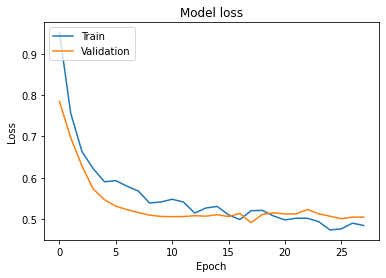

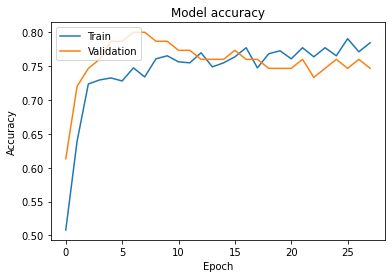

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
